<a href="https://colab.research.google.com/github/Melikakmm/CLPBgroup17/blob/main/ASSIGNMENT_1/Question_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SECOND FUNCTION:

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run /content/nonlinear_function.py

# training data
perc_train = 0.8
!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


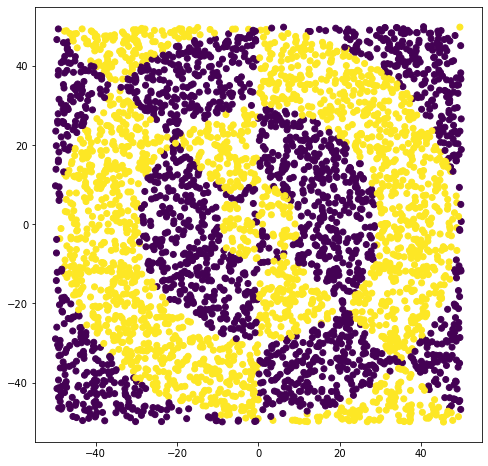

In [2]:
N = 4000
TYPE=2
B = 100

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

2
[-31.60811883 -29.54397214] 1.0
[6.77250291 9.5544703 ] 0.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


<function matplotlib.pyplot.show>

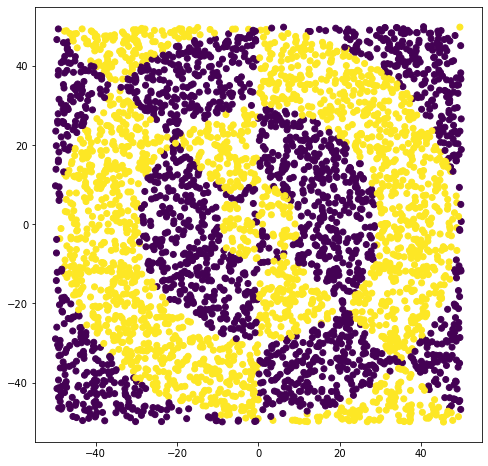

In [3]:

x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [4]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [5]:
#rescaling
def Rescale(variable):
    variable = (variable-variable.mean())/np.sqrt(variable.var())
    return variable

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)







In [6]:
def create_model(CASE = 1, optimizer = "adam", dropout = 0.2, hidden_layers = 2,
                 activation_hidden_layers = 'relu', number_of_nodes = 20):
    
    if CASE == 1 :
        model = Sequential()
        model.add(Dense(L,input_shape=(L,),activation = 'relu',kernel_initializer='glorot_uniform'))
        for i in range(hidden_layers):
            model.add(Dense(number_of_nodes, activation=activation_hidden_layers))
        model.add(Dropout(dropout))
        model.add(Dense(1,activation='sigmoid'))

    if CASE == 2 :
        model = Sequential()
        model.add(Dense(L, input_shape = (L,),activation = 'sigmoid'))
        model.add(Dense(3, activation = 'sigmoid'))
        model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss= 'binary_crossentropy',
                  optimizer = optimizer,
                  metrics = ['accuracy'])
    
    model.save_weights('initial_weights.txt')
    
    return model


model  = create_model(CASE = 1, optimizer = "adam",dropout = 0.2,hidden_layers = 2,
                      activation_hidden_layers = 'relu', number_of_nodes = 20)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________


In [7]:
nepoch = 400
model.save_weights('initial_weights.txt')
fit_initial = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=0)

In [8]:
#we want to implement Q1 for this function



#reduce X10
red_x = np.loadtxt('/content/reducedx10_data-for-DNN-1.dat')
red_y = np.loadtxt('/content/reducedx10_labels-for-DNN-1.dat')
red_N = len(red_x)
red_L = len(red_x[0])

red_m_training = int(perc_train * red_N )




(x_train_red, y_train_red) = (red_x[0:red_m_training],red_y[0:red_m_training])
(x_valid_red, y_valid_red) = (red_x[red_m_training:red_N],red_y[red_m_training:red_N])
print("Train:",len(x_train_red),"\t Validation:",len(x_valid_red))
print(len(red_x))

x_train_red = Rescale(x_train_red, )
x_valid_red = Rescale(x_valid_red)

Train: 320 	 Validation: 80
400


In [9]:
model.save_weights('initial_weights.txt')
fit_red = model.fit(x_train_red, y_train_red,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid_red,y_valid_red),
               verbose=0)

In [11]:
#increaseX4

x_inc = np.loadtxt('/content/increasedx4_data-for-DNN-1.dat')
y_inc = np.loadtxt('/content/ncreasedx4_labels-for-DNN-1.dat')

x_inc_N = len(x_inc)


train_inc_N = int(perc_train * x_inc_N)



(x_train_inc, y_train_inc) = (x_inc[0:train_inc_N],y_inc[0:train_inc_N])
(x_valid_inc, y_valid_inc) = (x_inc[train_inc_N: x_inc_N],y_inc[train_inc_N: x_inc_N])
print("Train:",len(x_train_inc),"\t Validation:",len(x_valid_inc))

x_train_inc = Rescale(x_train_inc)
x_valid_inc = Rescale(x_valid_inc)

Train: 12800 	 Validation: 3200


In [12]:
model.save_weights('initial_weights.txt')
fit_inc = model.fit(x_train_inc, y_train_inc,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid_inc,y_valid_inc),
               verbose=0)

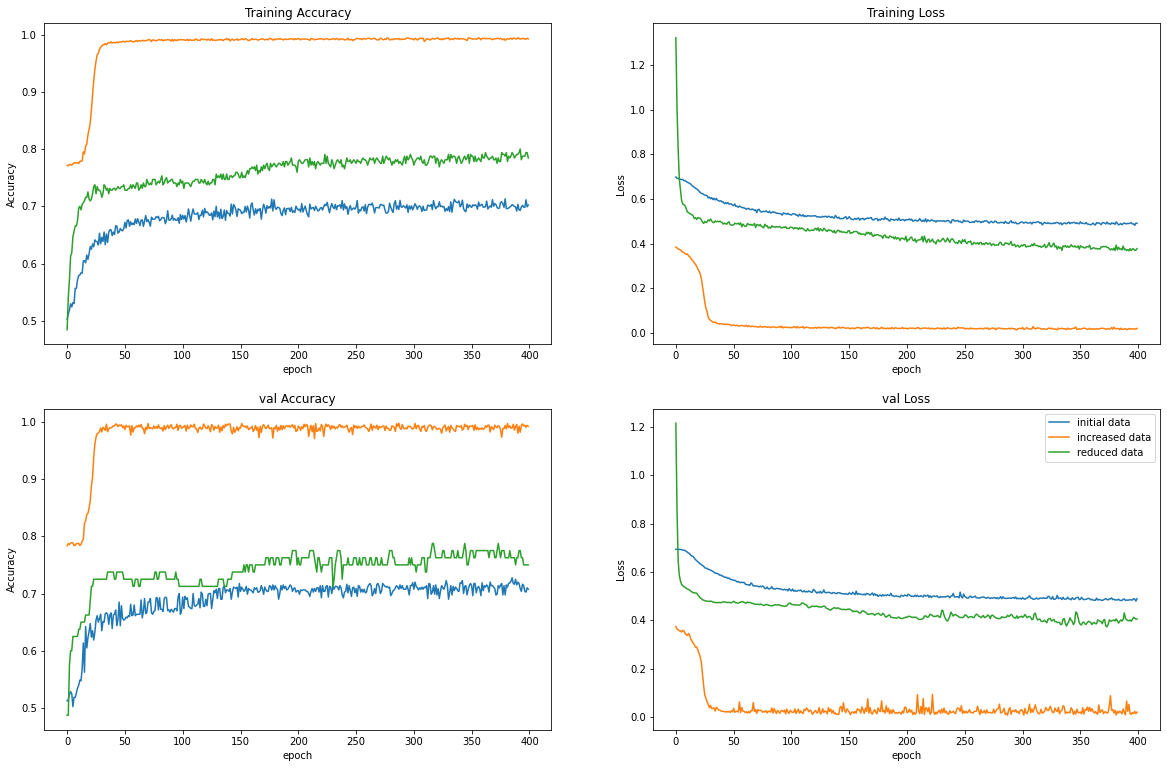

In [13]:


fig,AX=plt.subplots(2,2,figsize=(20, 13))
ax=AX[0, 0]
ax.plot(fit_initial.history['accuracy'],label="initial data")
ax.plot(fit_inc.history['accuracy'],label="increased data")
ax.plot(fit_red.history['accuracy'],label="reduced data")
ax.set_title('Training Accuracy')
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")


ax=AX[0, 1]
ax.plot(fit_initial.history['loss'],label="initial data")
ax.plot(fit_inc.history['loss'],label="increased data")
ax.plot(fit_red.history['loss'],label="reduced data")
ax.set_title('Training Loss')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")



ax = AX[1, 0]
ax.plot(fit_initial.history['val_accuracy'],label="initial data")
ax.plot(fit_inc.history['val_accuracy'],label="increased data")
ax.plot(fit_red.history['val_accuracy'],label="reduced data")
ax.set_title('val Accuracy')
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")


ax = AX[1, 1]
ax.plot(fit_initial.history['val_loss'],label="initial data")
ax.plot(fit_inc.history['val_loss'],label="increased data")
ax.plot(fit_red.history['val_loss'],label="reduced data")
ax.set_title('val Loss')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")

ax.legend()









<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a4431507-7850-48a0-bcb6-9c5c94fb54a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>